In [1]:
import sys  
sys.path.insert(1, '../lattice-estimator/lattice-estimator')
from estimator import *

%pip install numpy scipy tqdm matplotx matplotlib
import numpy as np
from scipy.special import lambertw
from tqdm.notebook import tqdm
import matplotx

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
plt.style.use(matplotx.styles.dufte)


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
N = 2**16
q=2**64
qs = [2**i for i in [32, 64, 128]]
h=floor(N / (log(q, 2)))
if h <= N * log(q, 2):
    h -= 1
print(f"{h=}, {N=}, {q=}")

h=1023, N=65536, q=18446744073709551616


In [19]:
all_ests = []
all_betas = []
for q in tqdm(qs):
    betas = [float(x) for x in np.logspace(2, log(q, 2), endpoint=False, base=2, num=10)]
    all_betas.append(betas)
    ests = []
    estimate = 0
    for beta in reversed(betas): 
        if False: #(estimate >= 2**500):
            # Skip estimation, it's going to be way larger anyway
            ests = [float('inf')] + ests
        else: 
            p = SIS.Parameters(n=h,m=N,q=q,length_bound=beta, norm=2)
            estimate = SIS.estimate.rough(p)['lattice']['rop']
            if estimate == +Infinity:
                estimate = float('inf')
            ests = [estimate] + ests
        print(f"{beta=}", ests)
    all_ests.append(ests)

  0%|          | 0/3 [00:00<?, ?it/s]

lattice  :: rop: ≈2^99.0, red: ≈2^99.0, δ: 1.004461, β: 339, d: 2257, tag: euclidean
beta=536870912.0 [6.28575154488387e29]
lattice  :: rop: ≈2^135.8, red: ≈2^135.8, δ: 1.003584, β: 465, d: 2518, tag: euclidean
beta=67108864.0 [7.47915977900922e40, 6.28575154488387e29]
lattice  :: rop: ≈2^191.0, red: ≈2^191.0, δ: 1.002804, β: 654, d: 2846, tag: euclidean
beta=8388608.0 [3.06970196324729e57, 7.47915977900922e40, 6.28575154488387e29]
lattice  :: rop: ≈2^278.3, red: ≈2^278.3, δ: 1.002119, β: 953, d: 3273, tag: euclidean
beta=1048576.0 [5.88061941467126e83, 3.06970196324729e57, 7.47915977900922e40, 6.28575154488387e29]
lattice  :: rop: ≈2^425.2, red: ≈2^425.2, δ: 1.001531, β: 1456, d: 3851, tag: euclidean
beta=131072.0 [9.62730468379705e127, 5.88061941467126e83, 3.06970196324729e57, 7.47915977900922e40, 6.28575154488387e29]
lattice  :: rop: ≈2^695.5, red: ≈2^695.5, δ: 1.001038, β: 2382, d: 4676, tag: euclidean
beta=16384.0 [2.39666483697101e209, 9.62730468379705e127, 5.88061941467126e83, 3

(1, 1.5912700038369222e+225)

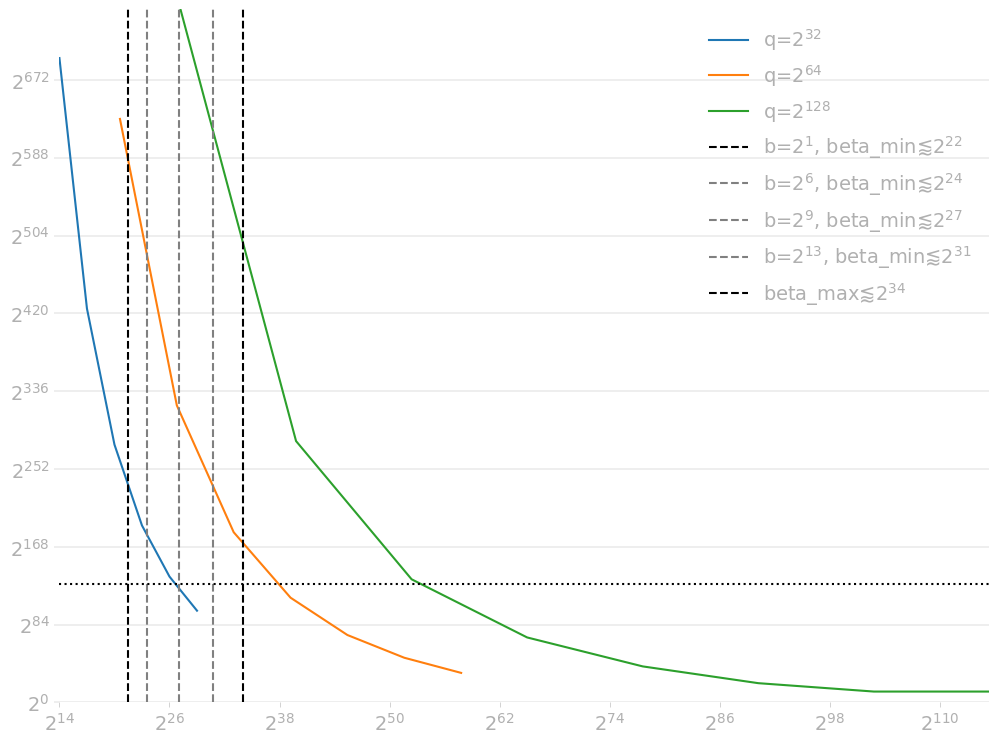

In [21]:
plt.xscale('log', base=2)
plt.yscale('log', base=2)

for q, betas, ests in zip(qs, all_betas, all_ests):
    plt.plot(betas, ests, label=f"q=$2^{{{log(q, 2)}}}$")
    # plt.axvline(x=q, color = 'gray') #, label = f"q=2^{log(q, 2)}")
beta_max = (4 * 128)**2 * N

bs = [float(x) for x in np.logspace(1, log(sqrt(beta_max), 2), endpoint=False, base=2, num=4)]
for b in bs: 
    beta_min = float(np.exp(-lambertw(- ln(b) / (2*128*b*sqrt(N)), k=-1).real))
    beta_min += 2 * b * 128 * sqrt(N)
    color = "black" if b == bs[0] else "gray"
    plt.axvline(x=beta_min, linestyle="dashed", color=color, label = f"b=$2^{{{ceil(log(b, 2))}}}$, beta_min⪅$2^{{{ceil(log(beta_min, 2))}}}$")
plt.axvline(x=beta_max, linestyle="dashed", color="black", label = f"beta_max⪅$2^{{{ceil(log(beta_max, 2))}}}$")

plt.axhline(y=2**128, linestyle="dotted", color="black")

plt.legend(loc='upper right', frameon=False)
plt.ylim(2**0, None)

lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 42, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 51, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 59, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 68, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 76, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 85, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 93, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 102, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 110, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 119, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 128, tag: euclidean
lattice  :: rop: ≈2^11.7, red: ≈2^11.7, δ: 1.012950, β: 40, d: 136, tag: euclidean
lattice  ::

lattice  :: rop: ≈2^69.5, red: ≈2^69.5, δ: 1.005632, β: 238, d: 1851, tag: euclidean
lattice  :: rop: ≈2^70.1, red: ≈2^70.1, δ: 1.005602, β: 240, d: 1860, tag: euclidean
lattice  :: rop: ≈2^70.7, red: ≈2^70.7, δ: 1.005572, β: 242, d: 1868, tag: euclidean
lattice  :: rop: ≈2^71.2, red: ≈2^71.2, δ: 1.005543, β: 244, d: 1877, tag: euclidean
lattice  :: rop: ≈2^71.5, red: ≈2^71.5, δ: 1.005529, β: 245, d: 1885, tag: euclidean
lattice  :: rop: ≈2^72.1, red: ≈2^72.1, δ: 1.005500, β: 247, d: 1894, tag: euclidean
lattice  :: rop: ≈2^72.7, red: ≈2^72.7, δ: 1.005471, β: 249, d: 1902, tag: euclidean
lattice  :: rop: ≈2^73.3, red: ≈2^73.3, δ: 1.005443, β: 251, d: 1911, tag: euclidean
lattice  :: rop: ≈2^73.6, red: ≈2^73.6, δ: 1.005429, β: 252, d: 1920, tag: euclidean
lattice  :: rop: ≈2^74.2, red: ≈2^74.2, δ: 1.005401, β: 254, d: 1928, tag: euclidean
lattice  :: rop: ≈2^74.8, red: ≈2^74.8, δ: 1.005374, β: 256, d: 1937, tag: euclidean
lattice  :: rop: ≈2^75.0, red: ≈2^75.0, δ: 1.005360, β: 257, d: 1

lattice  :: rop: ≈2^130.5, red: ≈2^130.5, δ: 1.003685, β: 447, d: 2824, tag: euclidean
lattice  :: rop: ≈2^131.1, red: ≈2^131.1, δ: 1.003673, β: 449, d: 2833, tag: euclidean
lattice  :: rop: ≈2^131.7, red: ≈2^131.7, δ: 1.003662, β: 451, d: 2841, tag: euclidean
lattice  :: rop: ≈2^132.3, red: ≈2^132.3, δ: 1.003650, β: 453, d: 2850, tag: euclidean
lattice  :: rop: ≈2^132.6, red: ≈2^132.6, δ: 1.003645, β: 454, d: 2858, tag: euclidean
lattice  :: rop: ≈2^133.2, red: ≈2^133.2, δ: 1.003634, β: 456, d: 2867, tag: euclidean
lattice  :: rop: ≈2^133.7, red: ≈2^133.7, δ: 1.003622, β: 458, d: 2875, tag: euclidean
lattice  :: rop: ≈2^134.3, red: ≈2^134.3, δ: 1.003611, β: 460, d: 2884, tag: euclidean
lattice  :: rop: ≈2^134.9, red: ≈2^134.9, δ: 1.003600, β: 462, d: 2892, tag: euclidean
lattice  :: rop: ≈2^135.5, red: ≈2^135.5, δ: 1.003589, β: 464, d: 2901, tag: euclidean
lattice  :: rop: ≈2^136.1, red: ≈2^136.1, δ: 1.003578, β: 466, d: 2909, tag: euclidean
lattice  :: rop: ≈2^136.7, red: ≈2^136.7, δ

lattice  :: rop: ≈2^204.1, red: ≈2^204.1, δ: 1.002670, β: 699, d: 3899, tag: euclidean
lattice  :: rop: ≈2^205.0, red: ≈2^205.0, δ: 1.002662, β: 702, d: 3908, tag: euclidean
lattice  :: rop: ≈2^205.6, red: ≈2^205.6, δ: 1.002656, β: 704, d: 3916, tag: euclidean
lattice  :: rop: ≈2^206.2, red: ≈2^206.2, δ: 1.002651, β: 706, d: 3925, tag: euclidean
lattice  :: rop: ≈2^206.7, red: ≈2^206.7, δ: 1.002645, β: 708, d: 3933, tag: euclidean
lattice  :: rop: ≈2^207.3, red: ≈2^207.3, δ: 1.002640, β: 710, d: 3942, tag: euclidean
lattice  :: rop: ≈2^207.9, red: ≈2^207.9, δ: 1.002634, β: 712, d: 3950, tag: euclidean
lattice  :: rop: ≈2^208.5, red: ≈2^208.5, δ: 1.002629, β: 714, d: 3959, tag: euclidean
lattice  :: rop: ≈2^209.1, red: ≈2^209.1, δ: 1.002623, β: 716, d: 3968, tag: euclidean
lattice  :: rop: ≈2^209.7, red: ≈2^209.7, δ: 1.002618, β: 718, d: 3976, tag: euclidean
lattice  :: rop: ≈2^210.2, red: ≈2^210.2, δ: 1.002613, β: 720, d: 3985, tag: euclidean
lattice  :: rop: ≈2^210.8, red: ≈2^210.8, δ

lattice  :: rop: ≈2^280.6, red: ≈2^280.6, δ: 1.002106, β: 961, d: 4940, tag: euclidean
lattice  :: rop: ≈2^281.2, red: ≈2^281.2, δ: 1.002102, β: 963, d: 4949, tag: euclidean
lattice  :: rop: ≈2^281.8, red: ≈2^281.8, δ: 1.002099, β: 965, d: 4957, tag: euclidean
lattice  :: rop: ≈2^282.4, red: ≈2^282.4, δ: 1.002096, β: 967, d: 4966, tag: euclidean
lattice  :: rop: ≈2^282.9, red: ≈2^282.9, δ: 1.002092, β: 969, d: 4974, tag: euclidean
lattice  :: rop: ≈2^283.8, red: ≈2^283.8, δ: 1.002088, β: 972, d: 4983, tag: euclidean
lattice  :: rop: ≈2^284.4, red: ≈2^284.4, δ: 1.002084, β: 974, d: 4992, tag: euclidean
lattice  :: rop: ≈2^285.0, red: ≈2^285.0, δ: 1.002081, β: 976, d: 5000, tag: euclidean
lattice  :: rop: ≈2^285.6, red: ≈2^285.6, δ: 1.002078, β: 978, d: 5009, tag: euclidean
lattice  :: rop: ≈2^286.2, red: ≈2^286.2, δ: 1.002075, β: 980, d: 5017, tag: euclidean
lattice  :: rop: ≈2^287.0, red: ≈2^287.0, δ: 1.002070, β: 983, d: 5026, tag: euclidean
lattice  :: rop: ≈2^287.6, red: ≈2^287.6, δ

lattice  :: rop: ≈2^364.4, red: ≈2^364.4, δ: 1.001725, β: 1248, d: 6033, tag: euclidean
lattice  :: rop: ≈2^365.3, red: ≈2^365.3, δ: 1.001722, β: 1251, d: 6041, tag: euclidean
lattice  :: rop: ≈2^365.9, red: ≈2^365.9, δ: 1.001720, β: 1253, d: 6050, tag: euclidean
lattice  :: rop: ≈2^366.5, red: ≈2^366.5, δ: 1.001717, β: 1255, d: 6058, tag: euclidean
lattice  :: rop: ≈2^367.0, red: ≈2^367.0, δ: 1.001715, β: 1257, d: 6067, tag: euclidean
lattice  :: rop: ≈2^367.9, red: ≈2^367.9, δ: 1.001712, β: 1260, d: 6075, tag: euclidean
lattice  :: rop: ≈2^368.5, red: ≈2^368.5, δ: 1.001710, β: 1262, d: 6084, tag: euclidean
lattice  :: rop: ≈2^369.1, red: ≈2^369.1, δ: 1.001708, β: 1264, d: 6092, tag: euclidean
lattice  :: rop: ≈2^370.0, red: ≈2^370.0, δ: 1.001705, β: 1267, d: 6101, tag: euclidean
lattice  :: rop: ≈2^370.5, red: ≈2^370.5, δ: 1.001703, β: 1269, d: 6109, tag: euclidean
lattice  :: rop: ≈2^371.1, red: ≈2^371.1, δ: 1.001701, β: 1271, d: 6118, tag: euclidean
lattice  :: rop: ≈2^371.7, red: 

lattice  :: rop: ≈2^442.1, red: ≈2^442.1, δ: 1.001485, β: 1514, d: 7005, tag: euclidean
lattice  :: rop: ≈2^442.7, red: ≈2^442.7, δ: 1.001483, β: 1516, d: 7014, tag: euclidean
lattice  :: rop: ≈2^443.5, red: ≈2^443.5, δ: 1.001481, β: 1519, d: 7022, tag: euclidean
lattice  :: rop: ≈2^444.1, red: ≈2^444.1, δ: 1.001480, β: 1521, d: 7031, tag: euclidean
lattice  :: rop: ≈2^444.7, red: ≈2^444.7, δ: 1.001478, β: 1523, d: 7040, tag: euclidean
lattice  :: rop: ≈2^445.6, red: ≈2^445.6, δ: 1.001476, β: 1526, d: 7048, tag: euclidean
lattice  :: rop: ≈2^446.2, red: ≈2^446.2, δ: 1.001474, β: 1528, d: 7057, tag: euclidean
lattice  :: rop: ≈2^447.1, red: ≈2^447.1, δ: 1.001472, β: 1531, d: 7065, tag: euclidean
lattice  :: rop: ≈2^447.6, red: ≈2^447.6, δ: 1.001471, β: 1533, d: 7074, tag: euclidean
lattice  :: rop: ≈2^448.2, red: ≈2^448.2, δ: 1.001469, β: 1535, d: 7082, tag: euclidean
lattice  :: rop: ≈2^449.1, red: ≈2^449.1, δ: 1.001467, β: 1538, d: 7091, tag: euclidean
lattice  :: rop: ≈2^449.7, red: 

lattice  :: rop: ≈2^526.2, red: ≈2^526.2, δ: 1.001296, β: 1802, d: 8029, tag: euclidean
lattice  :: rop: ≈2^526.8, red: ≈2^526.8, δ: 1.001294, β: 1804, d: 8038, tag: euclidean
lattice  :: rop: ≈2^527.6, red: ≈2^527.6, δ: 1.001293, β: 1807, d: 8046, tag: euclidean
lattice  :: rop: ≈2^528.2, red: ≈2^528.2, δ: 1.001292, β: 1809, d: 8055, tag: euclidean
lattice  :: rop: ≈2^529.1, red: ≈2^529.1, δ: 1.001290, β: 1812, d: 8064, tag: euclidean
lattice  :: rop: ≈2^529.7, red: ≈2^529.7, δ: 1.001289, β: 1814, d: 8072, tag: euclidean
lattice  :: rop: ≈2^530.6, red: ≈2^530.6, δ: 1.001287, β: 1817, d: 8081, tag: euclidean
lattice  :: rop: ≈2^531.1, red: ≈2^531.1, δ: 1.001286, β: 1819, d: 8089, tag: euclidean
lattice  :: rop: ≈2^532.0, red: ≈2^532.0, δ: 1.001284, β: 1822, d: 8098, tag: euclidean
lattice  :: rop: ≈2^532.6, red: ≈2^532.6, δ: 1.001283, β: 1824, d: 8106, tag: euclidean
lattice  :: rop: ≈2^533.2, red: ≈2^533.2, δ: 1.001282, β: 1826, d: 8115, tag: euclidean
lattice  :: rop: ≈2^534.1, red: 

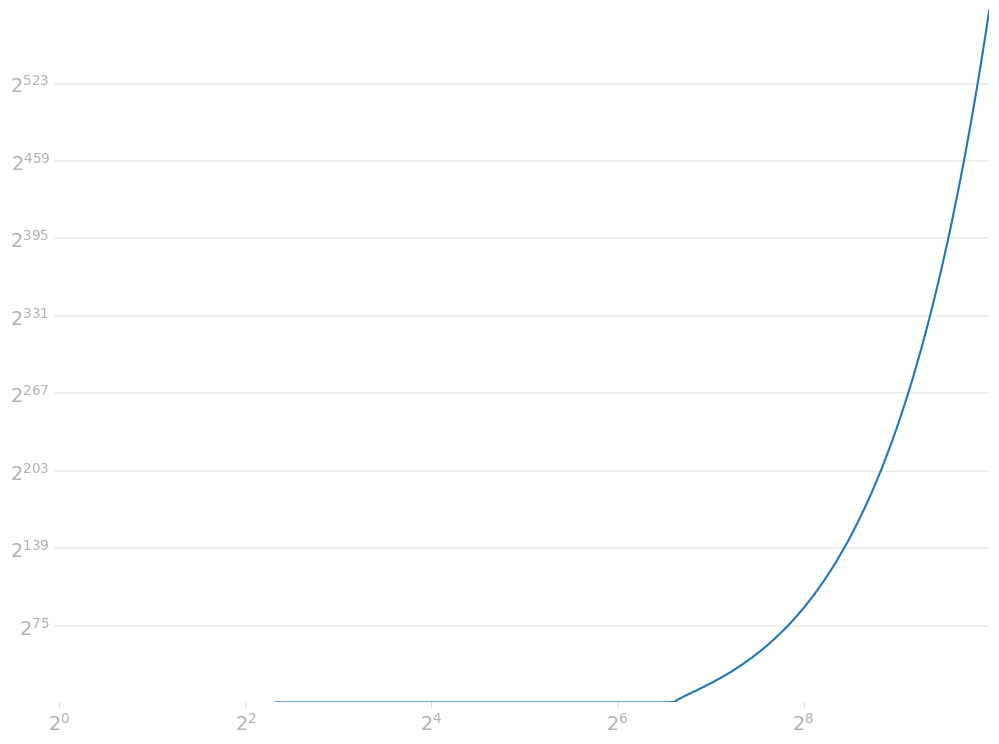

In [22]:
hs = list(range(1, h))
params = [SIS.Parameters(n=i,m=N,q=q,length_bound=2**30, norm=2) for i in hs]
ests = [SIS.estimate.rough(p)['lattice']['rop'] for p in params]
ests = list(map(lambda x : -1 if x == +Infinity or x == float('inf') else x, ests))

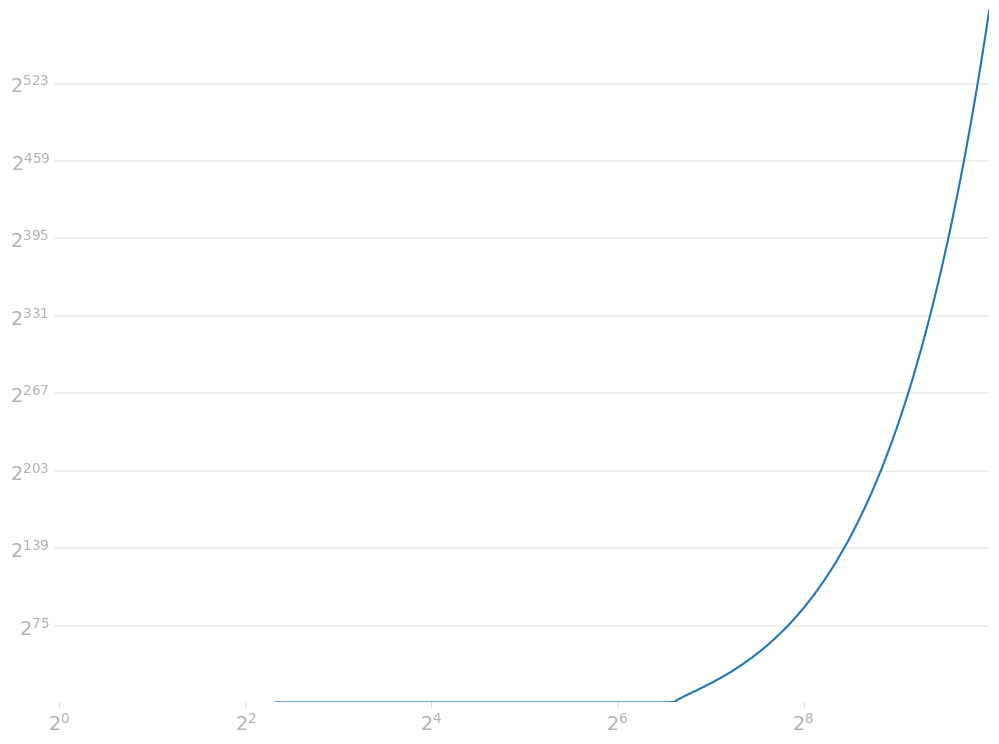

In [23]:
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.plot(hs, ests)